In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
fn = 'data/20211012 BBS Commentaries Poll (Responses) - Form Responses 1.csv'
df = pd.read_csv(fn).iloc[2:, :]
orig_columns = df.columns
df.columns = ['timestamp', 'doi', 'social-bonding', 'credible-signalling', 'adequacy', 'email', 'remarks']

# Center scores
df['social-bonding'] = df['social-bonding'] - 3
df['credible-signalling'] = df['credible-signalling'] - 3
df['adequacy'] = df['adequacy'] - 3

In [73]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

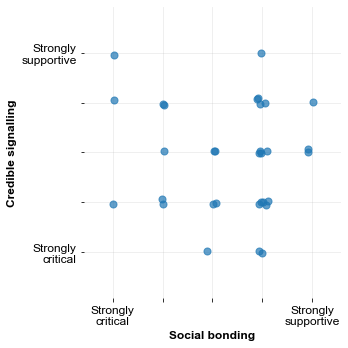

In [191]:
def format_axis(ax):
    ax.axis('equal')
    plt.grid(alpha=.25, zorder=-1)
    ax.set_axisbelow(True)
    labels = ['Strongly\ncritical', None, None, None, 'Strongly\nsupportive']
    plt.xticks(range(-2, 3), labels)
    plt.yticks(range(-2, 3), labels);
    plt.ylabel('Credible signalling', fontweight='bold')
    # plt.gca().axis["left"].major_ticklabels.set_ha("left")
    plt.xlabel('Social bonding', fontweight='bold')
    sns.despine(left=True, bottom=True)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

plt.figure(figsize=(5, 5), tight_layout=True)
jitter = np.random.normal(scale=.05, size=(len(df), 2))
plt.scatter(df['social-bonding'] + jitter[:, 0], df['credible-signalling'] + jitter[:, 1],
           s=50, alpha=.7, zorder=2)

ax = plt.gca()
format_axis(ax)
plt.savefig('figures/basic-scatter-plot.jpg', dpi=150)

## Countplot

In [78]:
from collections import Counter

In [79]:
counts = Counter()
for _, datapoint in df[['social-bonding', 'credible-signalling']].iterrows():
    counts[tuple(datapoint)] += 1

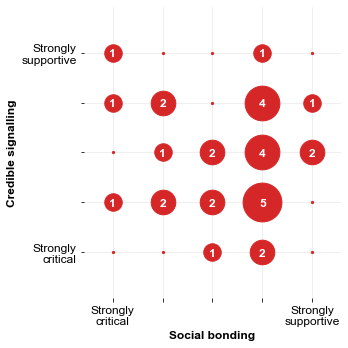

In [192]:
plt.figure(figsize=(5, 5), tight_layout=True)

for x in range(-2, 3):
    for y in range(-2, 3):
        count = counts[(x, y)]
        plt.scatter(x, y, s=5 + 300*count, color='C3', zorder=10, )
        if count > 0:
            plt.annotate(count, (x, y-.02), color='w', zorder=11, 
                         ha='center', va='center', fontsize=12, fontweight='bold')
        
format_axis(plt.gca())
plt.savefig('figures/count-plot.jpg', dpi=150)

## Colored countplot

In [162]:
from matplotlib.colors import Normalize
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

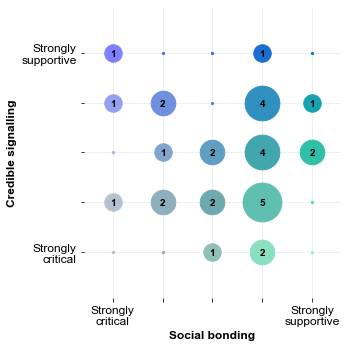

In [206]:
plt.figure(figsize=(5, 5), tight_layout=True)

def point_props(x, y, cmap_name='winter', min_alpha=0):
    color_diagonal = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
    alpha_diagonal = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
    cmap = plt.get_cmap(cmap_name)
    norm = Normalize(vmin=color_diagonal.dot([-2, 2]), vmax=color_diagonal.dot([2, -2]))
    
    point = np.array([x, y])
    color = cmap(norm(point.dot(color_diagonal)))
    hsv = rgb_to_hsv(color[:3])
    
    alpha = norm(point.dot(alpha_diagonal))
    alpha = min_alpha + (1 - min_alpha) * alpha
    
    hsv[1] = hsv[1] * alpha
    color = hsv_to_rgb(hsv)
    return dict(color=color)

format_axis(plt.gca())

for x in range(-2, 3):
    for y in range(-2, 3):
        count = counts[(x, y)]
        size = 5 + 300*count
        props = point_props(x, y)
        plt.scatter(x, y, s=size, **props)
        
        if count > 0:
            plt.annotate(count, (x, y-.02), color='k', zorder=11, 
                ha='center', va='center', fontsize=10, fontweight='bold')

plt.savefig('figures/colored-count-plot.jpg', dpi=150)